In [158]:
import pandas as pd
from scipy.stats import kstest
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from math import sqrt
from IPython.display import HTML
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [126]:
df = pd.read_csv('aa-delays-2023.csv')
df.drop(['Unnamed: 27'],axis=1, inplace=True)
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df.columns.values

array(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'], dtype=object)

In [128]:
correlation = df['WEATHER_DELAY'].corr(df['ARR_DELAY'])
correlation

0.34056930066656216

In [129]:
string_columns = df.select_dtypes(include='object').columns
cleaned_df = df.drop(columns=(['ARR_DELAY'] + list(string_columns)))
cleaned_df.columns.values

array(['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'], dtype=object)

In [130]:
cleaned_df['DELAY_Target'] = cleaned_df['DEP_DELAY'].apply(lambda x: 1 if x>15 else 0)
cleaned_df.head()


,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAY_Target
0,2429,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,...,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,0
1,2427,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,...,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,0
2,2426,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,...,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,0
3,2425,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,...,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,0
4,2424,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,...,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,1


In [131]:
correlation = cleaned_df.corr()['DELAY_Target'].drop('DELAY_Target')
correlation.sort_values(ascending=False)

DEP_DELAY              0.695913
LATE_AIRCRAFT_DELAY    0.448411
CARRIER_DELAY          0.401631
WEATHER_DELAY          0.177734
WHEELS_OFF             0.158048
DEP_TIME               0.149685
NAS_DELAY              0.125813
CRS_ARR_TIME           0.094195
CRS_DEP_TIME           0.077311
WHEELS_ON              0.066144
ARR_TIME               0.054764
SECURITY_DELAY         0.034931
TAXI_OUT               0.028830
OP_CARRIER_FL_NUM      0.001057
TAXI_IN               -0.003489
DIVERTED              -0.012657
CRS_ELAPSED_TIME      -0.030873
CANCELLED             -0.031984
ACTUAL_ELAPSED_TIME   -0.033288
AIR_TIME              -0.036834
DISTANCE              -0.051442
Name: DELAY_Target, dtype: float64

In [132]:
arr_delay = df['ARR_TIME'].dropna()[:100]
arr_delay

0     1722.0
1     1230.0
2     1636.0
3     1754.0
4      936.0
       ...  
95    2131.0
96    1009.0
97     534.0
98    1026.0
99    1523.0
Name: ARR_TIME, Length: 100, dtype: float64

In [133]:
ks_statistic, p_value = kstest(arr_delay, 'norm', args=(arr_delay.mean(), arr_delay.std()))
ks_test_result = f"Kolmogorov-Smirnov Test Statistic: {ks_statistic}, P-value: {p_value}"
ks_test_result

'Kolmogorov-Smirnov Test Statistic: 0.09796878572989387, P-value: 0.2741254956219601'

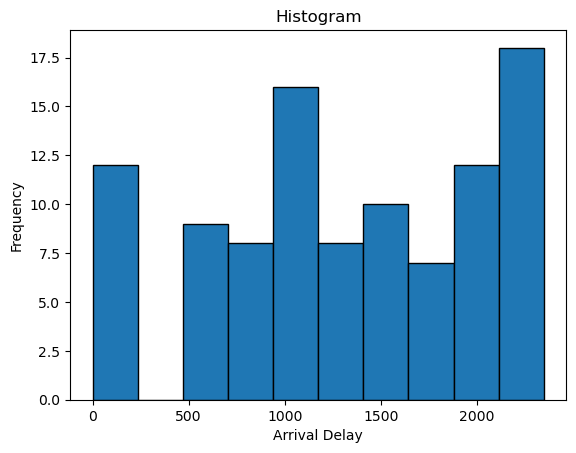

In [134]:
plt.hist(arr_delay, bins=10, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.show()

In [135]:
arr_delay_transformed_sqrt = np.sqrt(arr_delay + 1 - arr_delay.min())
ks_statistic_sqrt, p_value_sqrt = kstest(arr_delay_transformed_sqrt, 'norm', 
                                         args=(arr_delay_transformed_sqrt.mean(), arr_delay_transformed_sqrt.std()))

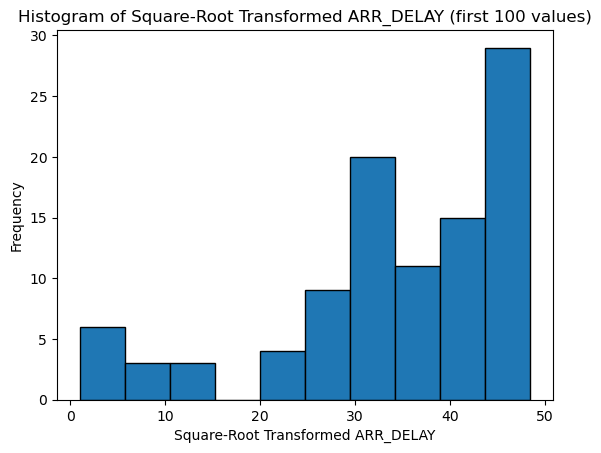

In [136]:
plt.hist(arr_delay_transformed_sqrt, bins=10, edgecolor='black')
plt.title("Histogram of Square-Root Transformed ARR_DELAY (first 100 values)")
plt.xlabel("Square-Root Transformed ARR_DELAY")
plt.ylabel("Frequency")
plt.show()

In [137]:
cleaned_df.columns.values

array(['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'DELAY_Target'], dtype=object)

In [138]:
X = cleaned_df.drop(columns=['DELAY_Target']).fillna(0)  # Fill NaN values with 0 for simplicity
y = cleaned_df['DELAY_Target']


In [139]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [141]:
y_pred = decision_tree.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)
accuracy

1.0

In [142]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       1.00      1.00      1.00       141

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568



In [143]:

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}

In [144]:

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

results

{'Linear Regression': 0.0764134555167807,
 'Decision Tree': 0.0,
 'MLP Regressor': 96.63000596436846}

In [145]:
evaluation_results = {
    "Model": [],
    "RMSE Train": [],
    "RMSE Test": [],
    "R2 Score Test": []
}

In [146]:

for name, model in models.items():
  
    model.fit(x_train, y_train)

    
    y_train_pred = model.predict(x_train)
    rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
    

    y_test_pred = model.predict(x_test)
    rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)


    evaluation_results["Model"].append(name)
    evaluation_results["RMSE Train"].append(rmse_train)
    evaluation_results["RMSE Test"].append(rmse_test)
    evaluation_results["R2 Score Test"].append(r2_test)

results_df = pd.DataFrame(evaluation_results)
html_table = results_df.to_html(index=False)
HTML(html_table)

Model,RMSE Train,RMSE Test,R2 Score Test
Linear Regression,0.272511,0.276430,0.590532
Decision Tree,0.000000,0.000000,1.000000
MLP Regressor,2.608524,9.830056,-516.799576


In [147]:
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [149]:
classification_results = {
    "Model": [],
    "Accuracy Test": [],
    "Precision Test": [],
    "Recall Test": [],
    "F1 Score Test": []
}

In [153]:
for name, model in classification_models.items():
    model.fit(x_train, y_train)

    y_test_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred, output_dict=True)
    
    classification_results["Model"].append(name)
    classification_results["Accuracy Test"].append(accuracy)
    classification_results["Precision Test"].append(report["weighted avg"]["precision"])
    classification_results["Recall Test"].append(report["weighted avg"]["recall"])
    classification_results["F1 Score Test"].append(report["weighted avg"]["f1-score"])

classification_results_df = pd.DataFrame(classification_results)
html_classification_table = classification_results_df.to_html(index=False)
HTML(html_classification_table)

/home/fariborz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model,Accuracy Test,Precision Test,Recall Test,F1 Score Test
Logistic Regression,0.984155,0.984535,0.984155,0.984246
Decision Tree,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,1.000000,1.000000,1.000000,1.000000
Logistic Regression,0.984155,0.984535,0.984155,0.984246
Decision Tree,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,1.000000,1.000000,1.000000,1.000000


In [154]:
comparison_results = {
    "Model": [],
    "AUC Test": [],
    "Recall Test": [],
    "F1 Score Test": []
}

In [ ]:
for name, model in classification_models.items():

    model.fit(x_train, y_train)
    
    y_test_pred_proba = model.predict_proba(x_test)[:, 1]
    
    auc = roc_auc_score(y_test, y_test_pred_proba)
    y_test_pred = model.predict(x_test)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    comparison_results["Model"].append(name)
    comparison_results["AUC Test"].append(auc)
    comparison_results["Recall Test"].append(recall)
    comparison_results["F1 Score Test"].append(f1)

comparison_results_df = pd.DataFrame(comparison_results)
html_comparison_table = comparison_results_df.to_html(index=False)
HTML(html_comparison_table)

/home/fariborz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model,AUC Test,Recall Test,F1 Score Test
Logistic Regression,0.998887,0.985816,0.968641
Decision Tree,1.000000,1.000000,1.000000
Gradient Boosting,1.000000,1.000000,1.000000


/home/fariborz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


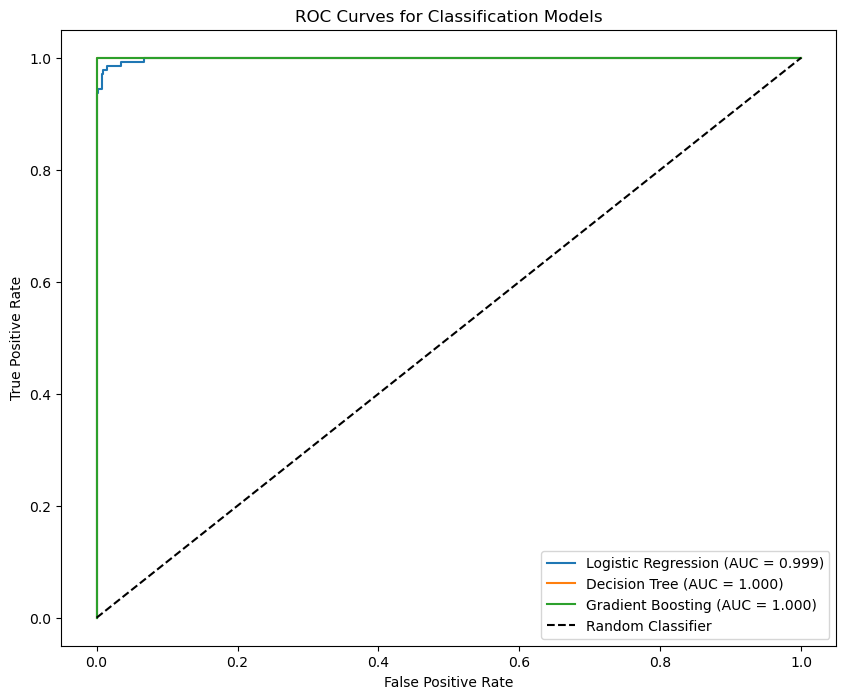

In [ ]:
plt.figure(figsize=(10, 8))
for name, model in classification_models.items():
    
    model.fit(x_train, y_train)
    y_test_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_test_pred_proba):.3f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Classification Models")
plt.legend(loc="lower right")
plt.show()

/home/fariborz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


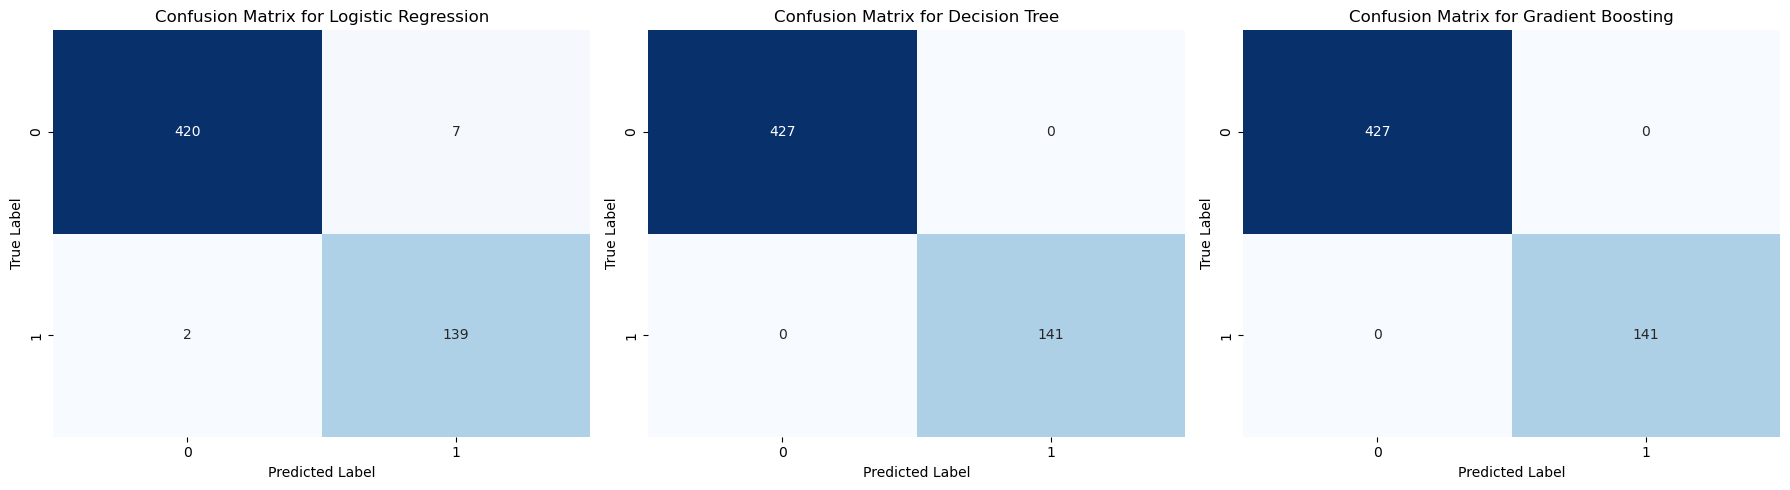

In [159]:
plt.figure(figsize=(18, 5))
for i, (name, model) in enumerate(classification_models.items(), 1):
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    

    cm = confusion_matrix(y_test, y_test_pred)
    
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()